<h1> Lecture 10:  Parameter Estimate using the maximum likelihood </h1>


<h3> Exercise 10.1 </h3>
<p> Write a library of functions to determine the parameter τ of an exponential distribution from a list of numbers filled with pseudo-random numbers distributed according to an exponential probability density distribution.

Compare the result obtained with the mean of the numbers saved in the list.

How does the result depend on the initial interval passed to the sezione_aurea_max_LL function?</p>

In [2]:
import random
import numpy as np
import stats as stats
from goldensearch import goldenratioMax
from likelihood import likelihood
from likelihood import loglikelihood
from math import exp

# ---------------------------------------------------------------------------------------------------------------
#this method  generate a single event that follow an exponential pdf
#---------------------------------------------------------------------------------------------------------------

def rand_exp(tau,seed = 0.):
     
     if tau <= 0. : raise ValueError('Tau must be a positive number')
     if seed != 0. : random.seed(float(seed))
     y = random.random()
     f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
     return f(y)

def generate_exp(tau,N,seed = 0.):
     exp = []
     if seed != 0. : random.seed(float(seed))
     for i in range(N): exp.append(rand_exp(tau,seed))
     return exp

#-----------------------------------------------------------------------------
# This Method calculate the maximum likelihood of a parameter theta
#-----------------------------------------------------------------------------
 
def LEP(L #likelihood or loglikelihood kind of function in function of theta parameter 
        ,pdf # probability distribution function that the sample follow
        ,sample # random generate measurement from the sample 
        ,xmin # minimum of the interval where to search the maximum of ltheta 
        ,xmax # maximum of the interval where to search the maximum of ltheta
        ):
     
    Ltheta = lambda theta : L(pdf,theta,sample)
    return goldenratioMax(Ltheta,xmin,xmax)

def exp_func(x,tau):
    
    expr = lambda x : 1/tau*exp(-x/tau)
    return expr(x)

def main():
     tau = 2.0
     N = 50
     xmin = 0.5
     xmax = 5
     sample = generate_exp(tau,N,10)

     max = LEP(likelihood,exp_func,sample,xmin,xmax)

     print(max)

# for the question the maximum of L(theta) coincide with the mean of the sample as expected and as seen in the script below 

     
if __name__ == '__main__': main()

1.694474490326799


<h3> Exercise 10.2 </h3>
<p>Plot the profile of the likelihood function and the point identified as its maximum. </p>

The mean of the sample is  1.694474499667716 and is error is:  1.1102230246251565e-16
1.6944744891529162
1.69447444287249


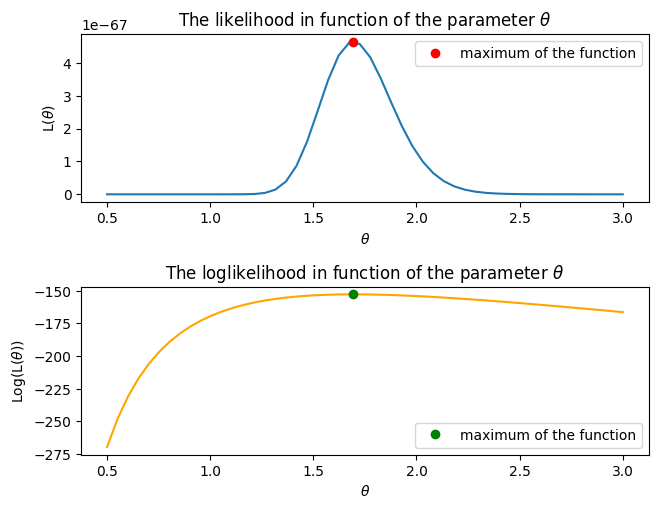

In [3]:
from math import exp
import matplotlib.pyplot as plt

#------------------------------------------------------------------------
#this method make the likelihood method a funcion of the parameter theta 
#------------------------------------------------------------------------
def Ltheta(L,theta,sample,pdf):

    ltheta = lambda theta : L(pdf,theta,sample)
    
    return ltheta(theta)

#--------------------------------------------------------------------------
#this method define the exponential pdf in function of a variable x
#--------------------------------------------------------------------------
def exp_func(x,tau):
    
    expr = lambda x : 1/tau*exp(-x/tau)
    
    return expr(x)

#--------------------------------------------------------------------------

def main():

    sample = generate_exp(2.0,100,10)

    theta = np.linspace(0.5,3)

    Ltheta = lambda theta : likelihood(exp_func,theta,sample)
    logLtheta = lambda theta : loglikelihood(exp_func,theta,sample)
    L = []
    
    for x in theta :
        L.append(Ltheta(x))

    logL = []

    for x in theta:
        logL.append(logLtheta(x))

    measure = stats.stats(sample)
    mean = measure.mean()
    err = measure.sigma_mean()
    max = goldenratioMax(Ltheta,0.5,3)
    logmax = goldenratioMax(logLtheta,0.5,3)


    print('The mean of the sample is ', mean , 'and is error is: ', err)
    
    fig, [ax1,ax2] = plt.subplots(2,1)
    fig.tight_layout(h_pad = 4.0)
    # First Graphics 

    ax1.plot(theta,L)
    ax1.plot(max,Ltheta(max),'o', color = 'red', label = 'maximum of the function') # plot the maixmum of Ltheta 
    ax1.set_title('The likelihood in function of the parameter ' + r'$\theta$')
    ax1.set_ylabel("L("+r"$\theta$" +")")
    ax1.set_xlabel(r"$\theta$")
    ax1.legend()

    # Second Graphics 

    ax2.plot(theta,logL, color = 'orange')
    ax2.plot(max,logLtheta(logmax),'o', color = 'green', label = 'maximum of the function') # plot the maixmum of Ltheta 
    ax2.set_title('The loglikelihood in function of the parameter ' + r'$\theta$')
    ax2.set_ylabel("Log(L("+r"$\theta$" +"))")
    ax2.set_xlabel(r"$\theta$")
    ax2.legend()
    
    
    print(max)
    print(logmax)

if __name__ == "__main__": main()

<h3> Exercise 10.4 </h3>
<p>Modify the loglikelihood function to calculate the logarithm of the product of the values of the probability density function, rather than the sum of individual logarithms. How does the algorithm’s behavior change?
We observe that the two method have the same behaviour in the esteem of the parameter tau</p>

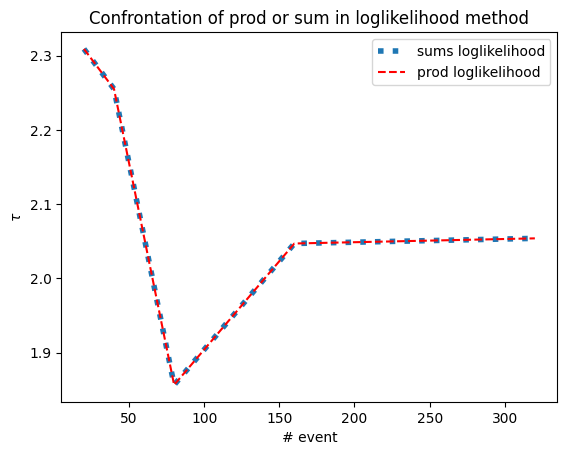

In [4]:
from math import log

def loglikelihood(pdf,theta, sample):
    
    loglike = 0 

    for x in sample:
        if pdf(x,theta) > 0.: loglike += log(pdf(x,theta))
    
    return loglike

def loglikelihood_prod(pdf,theta, sample):
    
    loglike = 1

    for x in sample:
        if pdf(x,theta) > 0.: loglike *= pdf(x,theta)

    return log(loglike)

def main():
    
    Nevt = 500
    Nevttest = 20
    tau_hat_sums = []
    tau_hat_prod = []
    N_evt_range = []
    bigsample = generate_exp(2.0,Nevt)

    while Nevttest <= Nevt:

        sample = bigsample[:Nevttest]
        tau_hat_sums.append(LEP(loglikelihood,exp_func,sample,0.5,3))
        tau_hat_prod.append(LEP(loglikelihood_prod,exp_func,sample,0.5,3))
        N_evt_range.append(Nevttest)
        Nevttest *= 2

    plt.plot(N_evt_range,tau_hat_sums,linestyle = 'dotted', linewidth = 4.0, label = 'sums loglikelihood')
    plt.plot(N_evt_range,tau_hat_prod,color = 'red', linestyle = 'dashed', label = 'prod loglikelihood')
    plt.title('Confrontation of prod or sum in loglikelihood method')
    plt.ylabel(r'$\tau$')
    plt.xlabel('# event')
    plt.legend()

if __name__ == "__main__": main()

<h3> Exercise 10.5 </h3>
<p>Graphically show that as the available sample size increases, the profile of the logarithm of the likelihood function becomes narrower.
<ul>
<li>To simplify visualization, use the logarithm of the ratio between the likelihood function and its maximum value:</li>
</ul>
</p> 

$$LLR(\theta) = log(\frac{L(\theta)}{L\hat{\theta}})$$

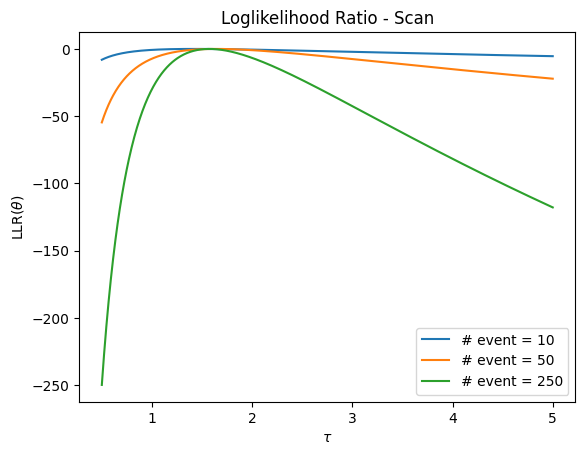

In [15]:
def main():

    tau_true = 2.0
    Nevt = 500
    Ntest = 10

    bigsample = generate_exp(tau_true,Nevt)
    tau= np.linspace(0.5,5.,1000)
    

    while Ntest <= Nevt:

        sample = bigsample[:Ntest]
        tau_hat = LEP(loglikelihood,exp_func,sample,0.5,5.)
        Lmax = Ltheta(loglikelihood,tau_hat,sample,exp_func)
        La = [Ltheta(loglikelihood,x,sample,exp_func) for x in tau]
        LLR = [x - Lmax for x in La ]
        plt.plot(tau,LLR, label = '# event = ' + str(Ntest))
        Ntest *= 5

    plt.title('Loglikelihood Ratio - Scan')
    plt.xlabel(r'$\tau$')
    plt.ylabel('LLR(' + r'$\theta$' ')')
    plt.legend()

if __name__ == "__main__": main()

<h3> Exercise 10.6 </h3>
<p> Use the bisection method to find the two points τ - στ and τ + στ related to Exercise 1.
<ul>
<li> Plot the log-likelihood profile, the estimator values, and the confidence interval along with the horizontal segment used for its determination.</li>
</ul>
 </p>